## Import Data

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")
import glob
import os

import random

# userAcceleration data
# float S8g = 4096.0;
# NewAcceleration = userAcceleration/S8g ;  
# unit = g

# rotationRate data (speed of rotation)
# float RFS2000 = 16.4;
# NewRotationRate = rotationRate/RFS2000 ;  
# unit = deg/s

# attitude "oriantation" (angle of rotation) 
# unit = deg

# gravity ( gravitional force on sensor axis)
# float S8g = 4096.0;
# NewGravity = gravity/S8g ;  
# unit = g

# Get data file names
START_T_COUNT = 0
START_F_COUNT = 500
SPLIT_T_RATIO = 0.8

path = r'D:\_1_Technicals\DataScience_Bootcamp\Final_project\Flutter_ArduinoConnect\02_Model_Trials\datasets\EDA_Phase\trial1'
filenames = glob.glob(path + "/*.csv")

# shuffeling the files as its always ordered alphabetic
random.seed(10)
shuffled_filenames = random.sample(filenames, len(filenames))


dfs = []
num_t = START_T_COUNT
num_f = START_F_COUNT
for filename in shuffled_filenames:
   
    df = pd.read_csv(filename, index_col=False)
    df.columns= ["time","rotR_x","rotR_y","rotR_z","acc_x","acc_y","acc_z","or_x","or_y","or_z","grav_x","grav_y","grav_z"]
    df.acc_x = df.acc_x/4096.0
    df.acc_y = df.acc_y/4096.0
    df.acc_z = df.acc_z/4096.0
    
    df.rotR_x = df.rotR_x/16.4
    df.rotR_y = df.rotR_y/16.4
    df.rotR_z = df.rotR_z/16.4
    
    df.grav_x = df.grav_x/4096.0
    df.grav_y = df.grav_y/4096.0
    df.grav_z = df.grav_z/4096.0
    
    _, tail = os.path.split(filename)
    df["action"] = str(tail).split(".")[0]
    

    if df.action.str.startswith("t_").sum():
        df["label"]= 1
        df["action_num"] = num_t # 0 - 30
        num_t +=1
    else:
        df["label"]= 0
        df["action_num"] = num_f # 100 - 122
        num_f +=1
    
    df = df.drop(columns="time")
    dfs.append(df)
df_all = pd.concat(dfs,axis=0).reset_index().rename(columns={"index":"time"})

In [283]:
import random
path = r'D:\_1_Technicals\DataScience_Bootcamp\Final_project\Flutter_ArduinoConnect\02_Model_Trials\datasets\EDA_Phase\trial1'
filenames = glob.glob(path + "/*.csv")


In [284]:
df_all.shape

(10280, 16)

In [285]:
df_all

,time,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,action,label,action_num
0,0,1.219512,0.182927,2.317073,-0.008545,0.007812,-0.006592,18,68,123,0.308105,-0.883301,0.352539,t_stand_front_drinksmallcup_10ml_1s_left,1,0
1,1,-0.426829,-0.304878,2.987805,-0.000977,-0.001709,-0.009033,17,68,123,0.305176,-0.884766,0.351562,t_stand_front_drinksmallcup_10ml_1s_left,1,0
2,2,-0.975610,0.304878,3.597561,0.000488,0.010498,-0.001953,17,68,123,0.302246,-0.885986,0.351074,t_stand_front_drinksmallcup_10ml_1s_left,1,0
3,3,-3.902439,2.682927,4.085366,0.004395,0.002930,-0.018311,17,68,123,0.298828,-0.887939,0.349121,t_stand_front_drinksmallcup_10ml_1s_left,1,0
4,4,-11.341463,5.609756,-0.548780,0.000000,0.022949,-0.002930,17,68,123,0.294922,-0.891846,0.342285,t_stand_front_drinksmallcup_10ml_1s_left,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10275,163,-2.500000,0.609756,3.048780,0.019775,-0.014160,-0.008545,-11,80,155,-0.197998,-0.965332,0.168701,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30
10276,164,-0.548780,1.585366,2.804878,0.014648,0.005615,-0.001709,-11,80,155,-0.199951,-0.965088,0.167725,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30
10277,165,-0.609756,1.829268,2.012195,0.014160,0.000732,-0.004395,-11,80,155,-0.200928,-0.965088,0.167236,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30
10278,166,0.182927,1.707317,1.158537,0.010254,0.006836,-0.006348,-11,80,155,-0.201660,-0.964844,0.167236,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30


In [286]:
df_all.describe()

,time,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,label,action_num
count,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000
mean,120.268677,0.645903,-0.217650,0.989217,0.015352,-0.000973,-0.005411,-8.634630,44.144066,188.631323,-0.143357,-0.549473,0.502353,0.705837,160.187743
std,93.016813,46.190426,30.474136,41.713982,0.071285,0.083417,0.066256,26.554959,35.626979,87.881588,0.415015,0.385081,0.321684,0.455688,226.690364
min,0.000000,-252.560976,-214.756098,-204.512195,-0.414795,-0.616211,-0.527832,-66.000000,-74.000000,0.000000,-0.919678,-0.999512,-0.965576,0.000000,0.000000
25%,47.000000,-12.865854,-7.576220,-10.914634,-0.011230,-0.031982,-0.027588,-30.000000,25.000000,111.000000,-0.505127,-0.813477,0.342224,0.000000,9.000000
50%,104.000000,0.304878,0.426829,-0.182927,0.006836,0.000000,-0.001709,-4.000000,49.000000,210.000000,-0.087646,-0.684692,0.587646,1.000000,20.000000
75%,176.000000,16.051829,7.621951,11.219512,0.042236,0.030273,0.018555,6.000000,64.000000,256.000000,0.109619,-0.353027,0.703918,1.000000,503.000000
max,583.000000,477.012195,276.829268,202.682927,0.616943,0.559570,0.521240,84.000000,166.000000,359.000000,0.995117,0.699219,0.998047,1.000000,522.000000


In [287]:
(df_all.label == 1).sum()

7256

## Missig Data

In [288]:
pd.isna(df_all).sum()

time          0
rotR_x        0
rotR_y        0
rotR_z        0
acc_x         0
acc_y         0
acc_z         0
or_x          0
or_y          0
or_z          0
grav_x        0
grav_y        0
grav_z        0
action        0
label         0
action_num    0
dtype: int64

##  Class Balance

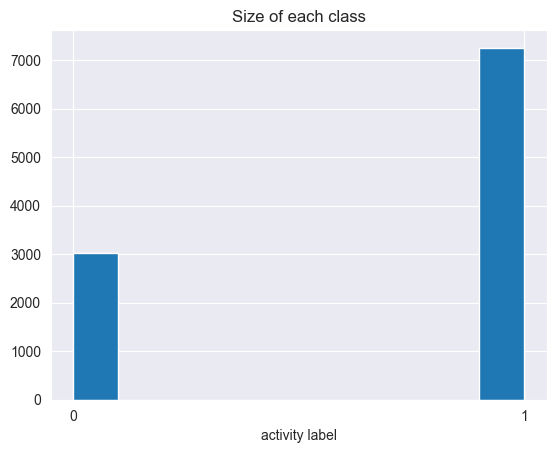

In [289]:
plt.title('Size of each class')
plt.xlabel('activity label')
plt.hist(df_all.label,rwidth=1)
plt.xticks([0,1]);

In [290]:
len(df_all.action_num.unique())

54

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

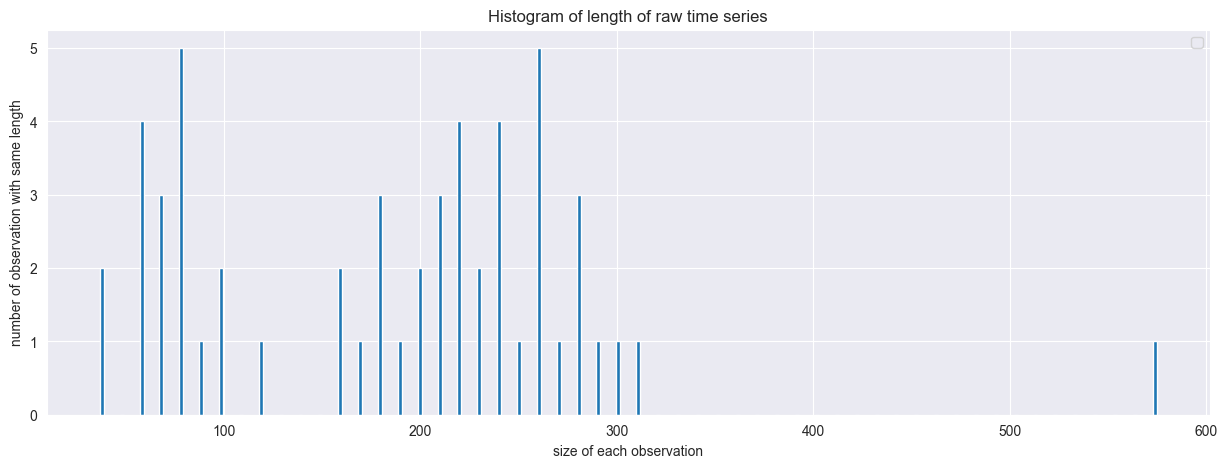

In [291]:
### Length of time series
action_num_list = df_all.action_num.unique()
series_length = list()
for act in action_num_list:
    series_length.append(df_all[(df_all.action_num == act)].shape[0])
plt.figure(2)
plt.figure(figsize=(15,5))
plt.title('Histogram of length of raw time series')
plt.hist(series_length,bins=len(action_num_list),rwidth=0.2,align='left');
#plt.xlim(0,350)
plt.xlabel("size of each observation")
plt.ylabel("number of observation with same length")
plt.legend()

In [292]:
# There is too small and too large datasets
# lets analyze which is which
action_num_list = df_all.action_num.unique()
each_series_length = list()
for act in action_num_list:
    each_series_length.append((df_all[(df_all.action_num == act)].shape[0],act))
each_series_length.sort()

In [293]:
each_series_length[-1]

(584, 4)

In [294]:
#check the largest dataset
dataset_name = df_all[df_all.action_num == each_series_length[-1][1]].action.unique()[0]
print(f"The largest dataset size is {each_series_length[-1][0]} with name: {dataset_name}")

The largest dataset size is 584 with name: t_sit_hold_DrinkCup_10ml_1s_right


In [295]:
#check the smallest datasets
dataset_name = df_all[df_all.action_num == each_series_length[0][1]].action.unique()[0]
print(f"The largest dataset size is:{each_series_length[0][0]} with name {dataset_name}")


The largest dataset size is:38 with name f_sit_front_EatFood_2sec_right


In [297]:
each_series_length[-1][1]

4

In [299]:
# drop the largest dataset
df_all = df_all[df_all.action_num != each_series_length[-1][1]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

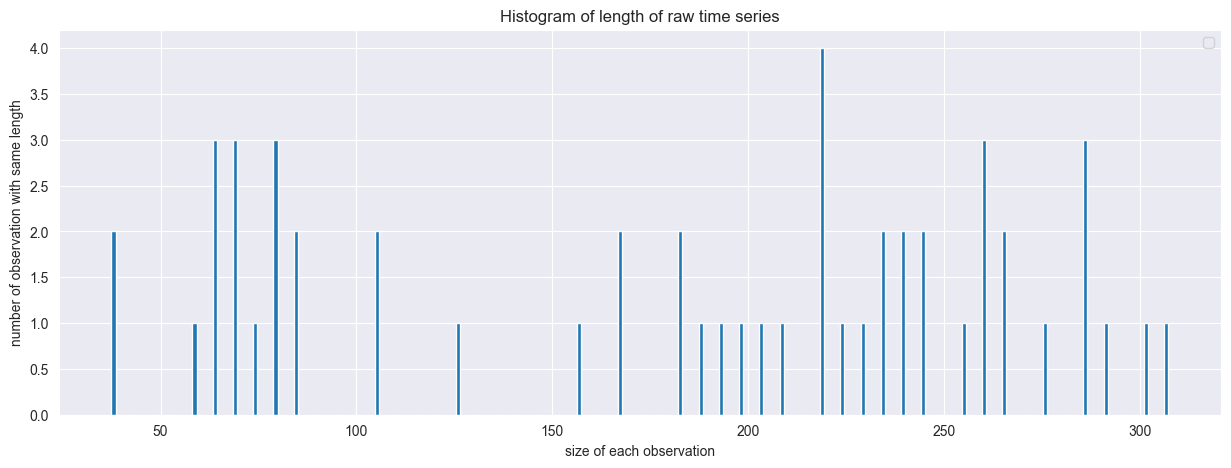

In [244]:
### Length of time series
action_num_list = df_all.action_num.unique()
series_length = list()
for act in action_num_list:
    series_length.append(df_all[(df_all.action_num == act)].shape[0])
plt.figure(2)
plt.figure(figsize=(15,5))
plt.title('Histogram of length of raw time series')
plt.hist(series_length,bins=len(action_num_list),rwidth=0.2,align='left');
#plt.xlim(0,350)
plt.xlabel("size of each observation")
plt.ylabel("number of observation with same length")
plt.legend();

### Conclusion

From above analysis

1. This dataset raised concern on class imbalance. --> make sure to consider same number of  f and t dataset 
2. The distribution of time-series length is broad. --> average dataset size should be around 200 - 300 (4sec to 6sec)

## Feature engineering

In [300]:
df_all.insert(1, 'accel_x', df_all.acc_x + df_all.grav_x)
df_all.insert(2, 'accel_y', df_all.acc_y + df_all.grav_y)
df_all.insert(3, 'accel_z', df_all.acc_z + df_all.grav_z)
df_all.insert(4, 'accel_norm', np.sqrt(df_all.accel_x**2 + df_all.accel_y**2 + df_all.accel_z**2))

In [301]:
df_all = df_all.drop(['or_x', 'or_y', 'or_z', 'grav_x', 'grav_y', 'grav_z', 'acc_x', 'acc_y', 'acc_z'], axis=1)

In [302]:
df_all

,time,accel_x,accel_y,accel_z,accel_norm,rotR_x,rotR_y,rotR_z,action,label,action_num
0,0,0.299561,-0.875488,0.345947,0.987874,1.219512,0.182927,2.317073,t_stand_front_drinksmallcup_10ml_1s_left,1,0
1,1,0.304199,-0.886475,0.342529,0.997848,-0.426829,-0.304878,2.987805,t_stand_front_drinksmallcup_10ml_1s_left,1,0
2,2,0.302734,-0.875488,0.349121,0.989956,-0.975610,0.304878,3.597561,t_stand_front_drinksmallcup_10ml_1s_left,1,0
3,3,0.303223,-0.885010,0.330811,0.992281,-3.902439,2.682927,4.085366,t_stand_front_drinksmallcup_10ml_1s_left,1,0
4,4,0.294922,-0.868896,0.339355,0.978326,-11.341463,5.609756,-0.548780,t_stand_front_drinksmallcup_10ml_1s_left,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10275,163,-0.178223,-0.979492,0.160156,1.008374,-2.500000,0.609756,3.048780,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30
10276,164,-0.185303,-0.959473,0.166016,0.991204,-0.548780,1.585366,2.804878,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30
10277,165,-0.186768,-0.964355,0.162842,0.995681,-0.609756,1.829268,2.012195,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30
10278,166,-0.191406,-0.958008,0.160889,0.990101,0.182927,1.707317,1.158537,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30


## Data Splitting

In [252]:
num_t_ds = len(df_all.query("action_num < @START_F_COUNT").action.unique())
num_f_ds = len(df_all.query("action_num >= @START_F_COUNT").action.unique())

In [305]:
num_train_t = round(num_t_ds * SPLIT_T_RATIO)
num_train_f = round(num_f_ds * SPLIT_T_RATIO)

train_df = df_all[(df_all.action_num.between(START_T_COUNT,START_T_COUNT+num_train_t,inclusive="both"))|
                  (df_all.action_num.between(START_F_COUNT,START_F_COUNT+num_train_f,inclusive="both"))]

test_df = df_all[(df_all.action_num.between(START_T_COUNT+num_train_t,START_F_COUNT,inclusive="neither"))|
                  (df_all.action_num > START_F_COUNT+num_train_f)]

In [306]:
len(train_df.action_num.unique())

43

In [307]:
len(test_df.action_num.unique())

10

In [251]:
test_df = df_all[(df_all.action_num <24)|(df_all.action_num> 105)]